In [1]:
import mglearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## KNN分类

In [3]:
X,y = mglearn.datasets.make_forge()

D:\Anaconda\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


单一最近邻模型对forge数据集的预测结果  
单一最近邻算法的预测结果就是那个点的标签

D:\Anaconda\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


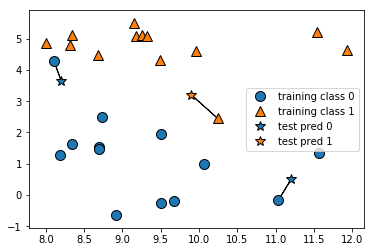

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

3近邻模型对forge数据集的预测结果  
左上角的新数据点的预测结果与只用一个邻居时的预测结果不同  
这张图是一个二分类的问题，但方法同样适用于多分类的数据集。  
对于多分类问题，将最常见的类别作为预测结果。  

D:\Anaconda\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


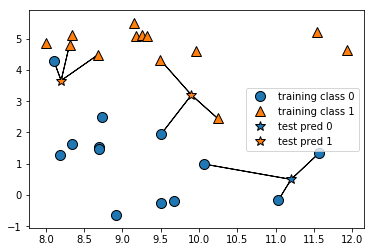

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X,y = mglearn.datasets.make_forge()

D:\Anaconda\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
X

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [9]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [11]:
from sklearn.neighbors import KNeighborsClassifier 

In [12]:
clf = KNeighborsClassifier(n_neighbors=3)

In [13]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [14]:
print("Test set score:{:.2f}".format(clf.score(X_test,y_test)))
#模型的精度约为86%

Test set score:0.86


## 分析KNeighborsClassifier
下面分别将1个，3个，9个邻居的三种情况的决策边界可视化

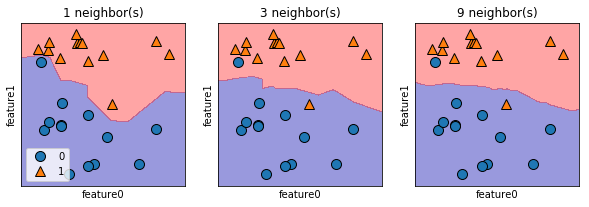

In [15]:
fig ,axes = plt.subplots(1,3,figsize=(10,3))
for n_neighbors,ax in zip([1,3,9],axes):
    #fit方法返回对象本身，所以我们可将实例化和拟合放在一行代码中
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature0")
    ax.set_ylabel("feature1")
axes[0].legend(loc=3)

随着邻居的越来越多，决策边界也越来越平滑，更平滑的边界对应更简单的模型，使用更少的邻居对应更高的模型复杂度，使用更多的邻居对应更低的模型复杂度。

#### 乳腺癌数据集

In [16]:
from sklearn.datasets import load_breast_cancer

In [17]:
cancer = load_breast_cancer()

In [18]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [19]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [20]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [21]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [22]:
X_train,X_test,y_train,y_test = train_test_split(
cancer.data,cancer.target,stratify=cancer.target,random_state=66)

In [23]:
training_accuracy = []
test_accuracy = []
#n_neighbors取值1到10
neighbors_settings = range(1,11) 

In [24]:
for n_neighbors in neighbors_settings:
    #构建模型
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    #记录训练集精度
    training_accuracy.append(clf.score(X_train,y_train))
    #记录泛化精度
    test_accuracy.append(clf.score(X_test,y_test))

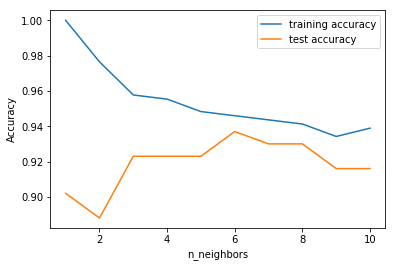

In [25]:
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

由这个图仍然可以看出过拟合和欠拟合的一些特征。  
仅考虑单一近邻，训练集上的预测结果非常完美，随着邻居个数的增多，模型变得更简单，训练集精度也会随之下降。  
单一邻居的测试集精度比使用更多邻居时要低，这表示单一近邻的模型过于复杂。  
与之相反，取近邻是10个的时候，模型又过于简单，性能甚至变得更差。  
最佳的大约在6左右，最差的性能在2时候取到

In [26]:
test_accuracy

[0.9020979020979021,
 0.8881118881118881,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9370629370629371,
 0.9300699300699301,
 0.9300699300699301,
 0.916083916083916,
 0.916083916083916]

In [27]:
training_accuracy

[1.0,
 0.9765258215962441,
 0.9577464788732394,
 0.9553990610328639,
 0.9483568075117371,
 0.9460093896713615,
 0.9436619718309859,
 0.9413145539906104,
 0.9342723004694836,
 0.9389671361502347]

## k近邻回归

单一近邻回归对wave数据集的预测结果

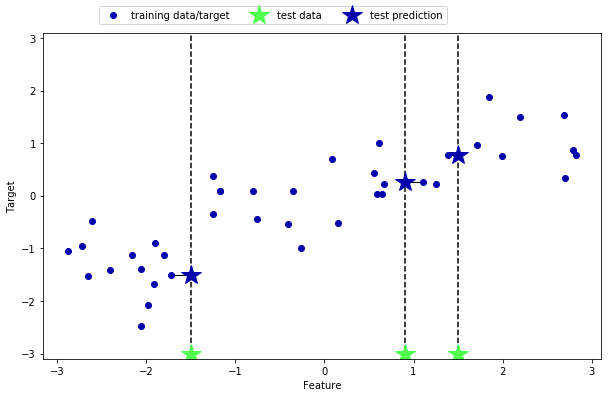

In [28]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

3个近邻回归对wave数据集的预测结果，预测结果为这些邻居的平均值

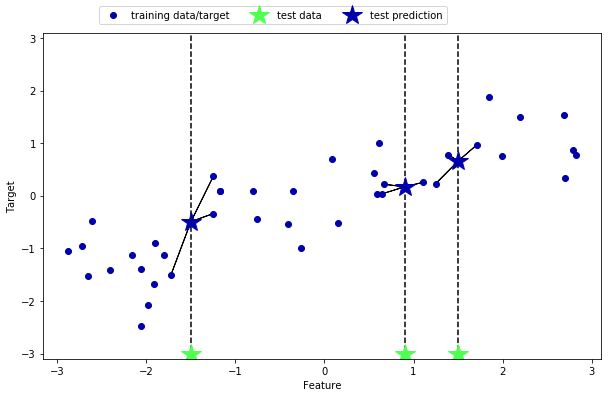

In [29]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

scikit-learn中的KNeighborsRegressor类中实现，与KNeighborsClassifier用法类似

In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
X,y = mglearn.datasets.make_wave(n_samples=40)

In [32]:
#将wave数据集分为训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [33]:
#将模型实例化，并将邻居个数设为3
reg = KNeighborsRegressor(n_neighbors=3)

In [34]:
#运用训练数据和训练目标值来拟合模型
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [35]:
#接下来进行预测
print("Test set prediction:\n{}".format(reg.predict(X_test)))

Test set prediction:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


### 也可以用score方法来评估模型
对于回归模型，这一方法返回的是R^2分数（决定系数），是回归模型的优度度量（0~1之间）。  
1对应完美预测  
0对应常数模型（？？？）

In [36]:
print("Test set R^2:{:.2f}".format(reg.score(X_test,y_test)))
#0.83表示模型的拟合相对较好

Test set R^2:0.83


## 分析KNeighborsRegressor

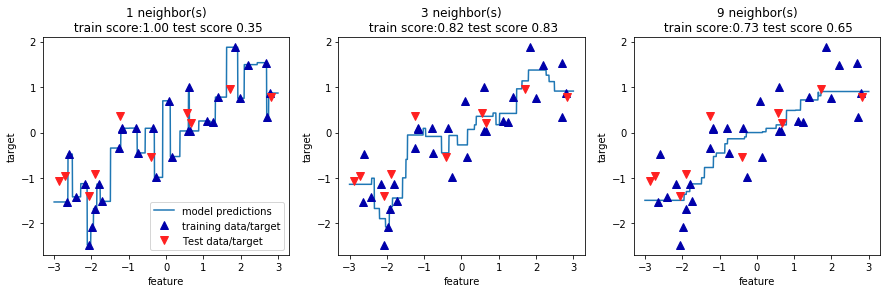

In [37]:
fig,axes = plt.subplots(1,3,figsize=(15,4))
#创建1000个数据点，在-3和3之间均匀分布
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors,ax in zip([1,3,9],axes):
    #利用1，3，9个邻居分别进行预测
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)
    ax.set_title(
    "{} neighbor(s)\n train score:{:.2f} test score {:.2f}".format(
        n_neighbors,reg.score(X_train,y_train),reg.score(X_test,y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    
axes[0].legend(["model predictions","training data/target",
               "Test data/target"],loc="best")

仅使用单一的邻居时，训练集中的每一个点都对预测结果有显著影响，预测结果的图像经过所有的数据点。这导致预测结果非常不稳定。